<a href="https://colab.research.google.com/github/rik53/stat/blob/main/proekt_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Исследование статистической связи между концентрацией флавоноидов и сортом вина.


Цель: Доказать, что между концентрацией флавоноидов и разными сортами вина есть корреляционная связь. 

In [14]:
wine = load_wine()
wine.keys()



dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Данные являются результатами химического анализа вин, выращенных в одном из регионов в Италии тремя разными производителями. Есть тринадцать разных измерений, проведенные для различных компонентов, входящих в три разных сорта вина.

In [15]:

data = wine["data"]
feature_names = wine["feature_names"]
target = wine['target']
target_names = wine['target_names']
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [16]:
df = pd.DataFrame(data, columns=feature_names)
df['class'] = wine["target"]
df.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [17]:
f'Всего строк: {df.shape[0]}, Всего столбцов: {df.shape[1]}'

'Всего строк: 178, Всего столбцов: 14'

In [18]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int64
dtype: object

In [19]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

Из данной таблицы мы видим, что в выборке отсутсвуют пропуски.

## Alcohol 

In [21]:
df['alcohol'].value_counts()

12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: alcohol, Length: 126, dtype: int64

Так как мы имеем 126 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

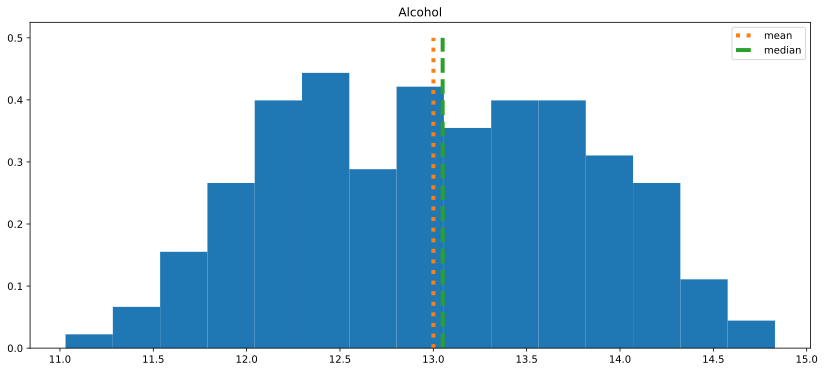

In [22]:
alcohol_mean = df['alcohol'].mean()
alcohol_median = df['alcohol'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['alcohol'],density=True, bins=15)

y = np.linspace(0, 0.5, 10)
plt.plot([alcohol_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([alcohol_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Alcohol')
plt.legend()

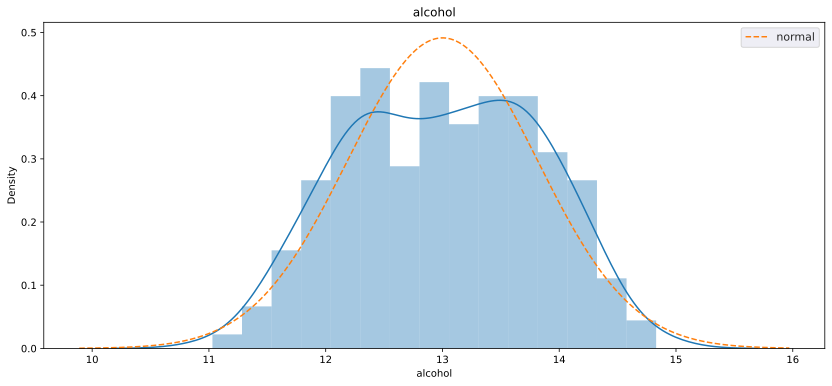

In [23]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['alcohol'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['alcohol'].mean()
scale = df['alcohol'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('alcohol')
plt.legend()



Text(0, 0.5, 'квантили выборки')

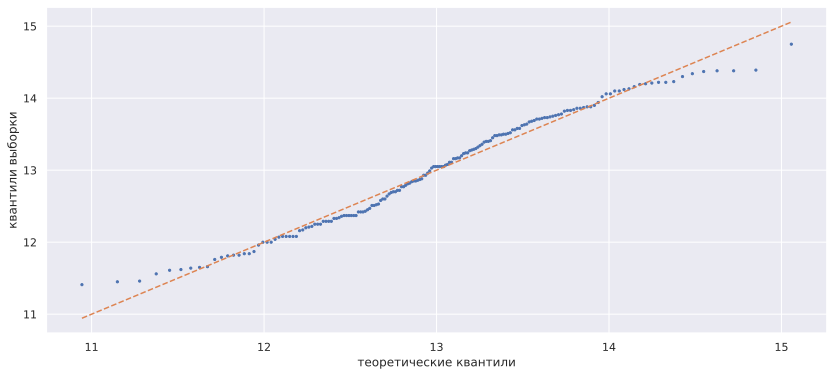

In [24]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['alcohol'].mean()
scale = df['alcohol'].std()
    
interval = np.linspace(0, 1, df['alcohol'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['alcohol'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

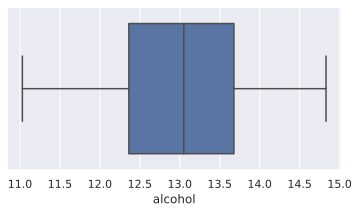

In [25]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['alcohol'], whis=1.5)

plt.xlabel('alcohol')
plt.show()

После проведения графического анализа мы можем сделать вывод об отсутствии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения и boxplot показывает отсутствие выбросов. Также мы видим, что распределение не относится к нормальному. 

## Malic_acid 

In [26]:
df['malic_acid'].value_counts()

1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: malic_acid, Length: 133, dtype: int64

Так как мы имеем 133 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

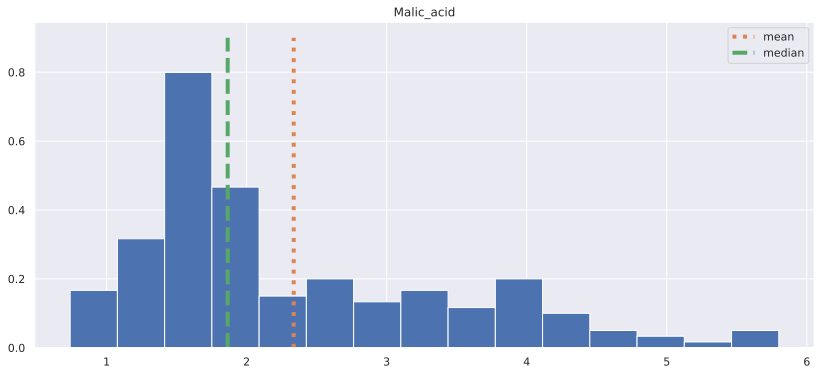

In [27]:
malic_acid_mean = df['malic_acid'].mean()
malic_acid_median = df['malic_acid'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['malic_acid'],density=True, bins=15)

y = np.linspace(0, 0.9, 10)
plt.plot([malic_acid_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([malic_acid_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Malic_acid')
plt.legend()

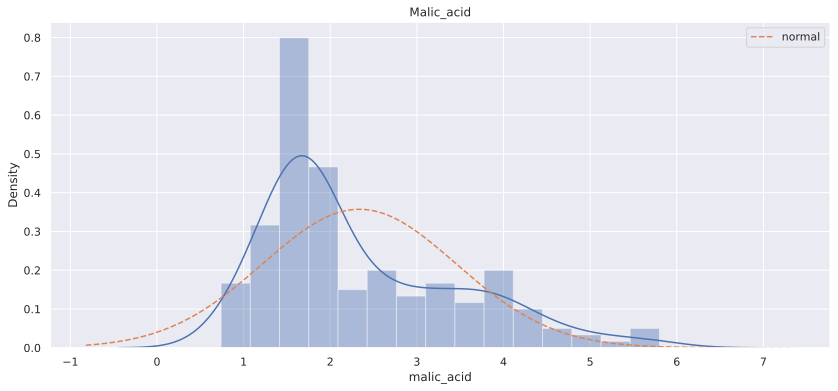

In [28]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['malic_acid'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['malic_acid'].mean()
scale = df['malic_acid'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Malic_acid')
plt.legend()


Text(0, 0.5, 'квантили выборки')

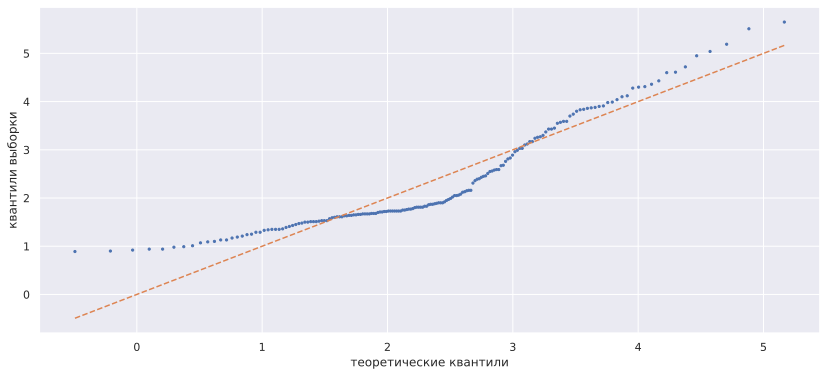

In [29]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['malic_acid'].mean()
scale = df['malic_acid'].std()
    
interval = np.linspace(0, 1, df['malic_acid'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['malic_acid'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

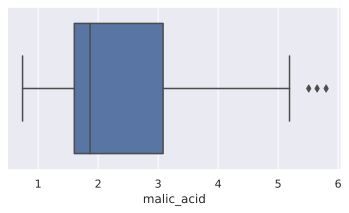

In [30]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['malic_acid'], whis=1.5)

plt.xlabel('malic_acid')
plt.show()

После проведения графического анализа мы можем сделать вывод о наличии выбросов с права в данной выборке так, среднее арифметическое находится правее от медианы и boxplot показывает наличие выбросов с права. Также мы видим, что распределение не относится к нормальному. 

## Ash 

In [31]:
df['ash'].value_counts()

2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: ash, Length: 79, dtype: int64

Так как мы имеем 79 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

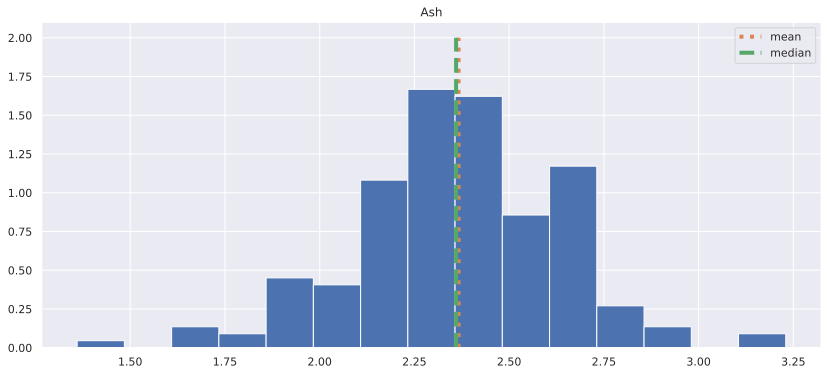

In [32]:
ash_mean = df['ash'].mean()
ash_median = df['ash'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['ash'],density=True, bins=15)


y = np.linspace(0, 2, 10)
plt.plot([ash_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([ash_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Ash')
plt.legend()

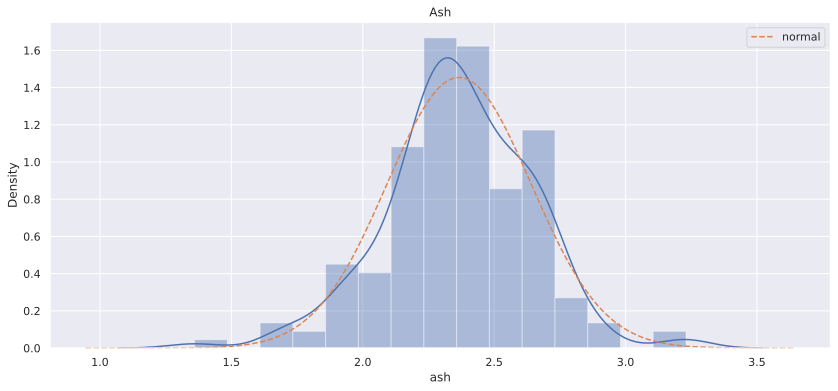

In [33]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['ash'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['ash'].mean()
scale = df['ash'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Ash')
plt.legend()

Text(0, 0.5, 'квантили выборки')

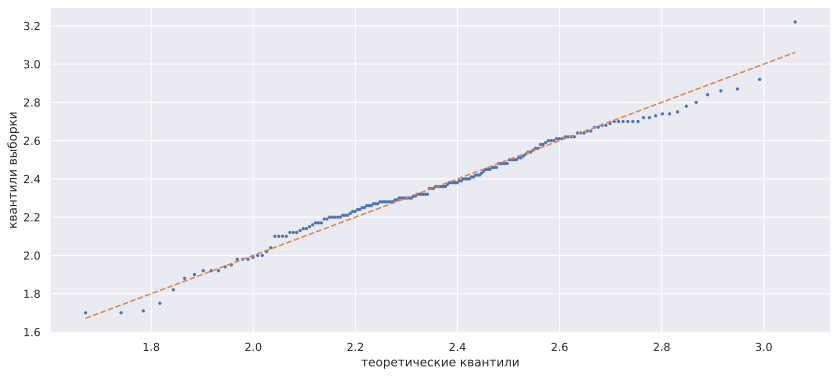

In [34]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['ash'].mean()
scale = df['ash'].std()
    
interval = np.linspace(0, 1, df['ash'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['ash'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

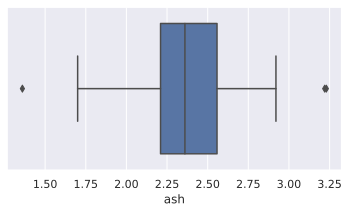

In [35]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['ash'], whis=1.5)

plt.xlabel('ash')
plt.show()

После проведения графического анализа мы видим, что медиана и среднее арифметическое имеют похожие значения, но boxplot показывает равномерные небольшие выбросы справа и слева. Также мы видим, что распределение не относится к нормальному. 

##Alcalinity of ash

In [36]:
df['alcalinity_of_ash'].value_counts()

20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: alcalinity_of_ash, Length: 63, dtype: int64

Так как мы имеем 63 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

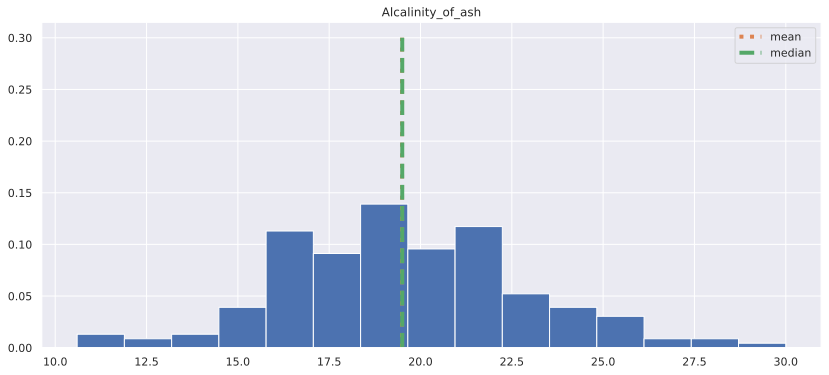

In [37]:
alcalinity_of_ash_mean = df['alcalinity_of_ash'].mean()
alcalinity_of_ash_median = df['alcalinity_of_ash'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['alcalinity_of_ash'],density=True, bins=15)

y = np.linspace(0, 0.3, 10)
plt.plot([alcalinity_of_ash_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([alcalinity_of_ash_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Alcalinity_of_ash')
plt.legend()


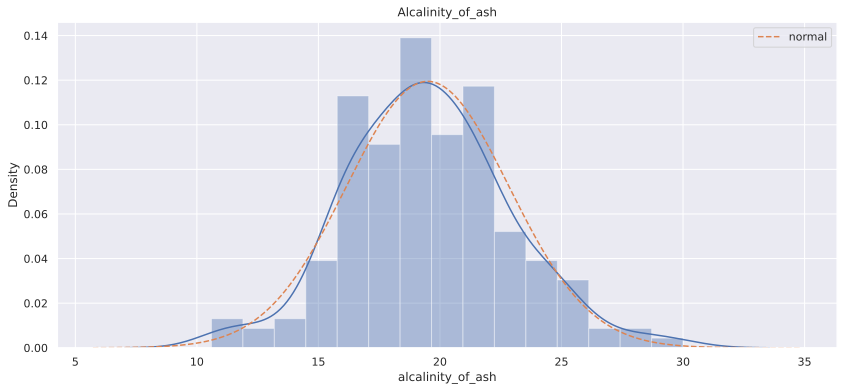

In [38]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['alcalinity_of_ash'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['alcalinity_of_ash'].mean()
scale = df['alcalinity_of_ash'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Alcalinity_of_ash')
plt.legend()

Text(0, 0.5, 'квантили выборки')

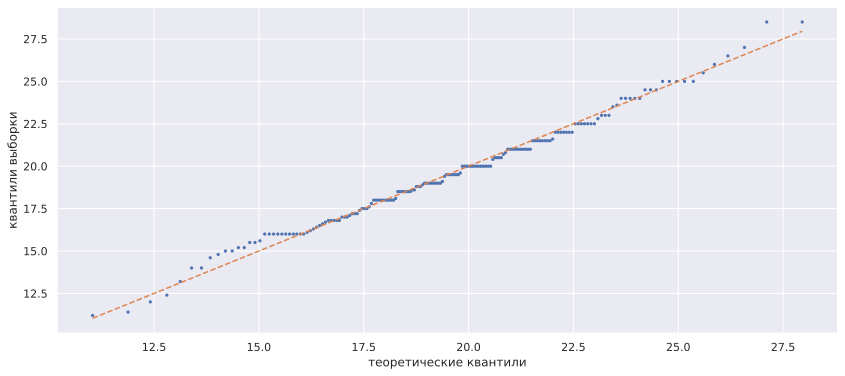

In [39]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['alcalinity_of_ash'].mean()
scale = df['alcalinity_of_ash'].std()
    
interval = np.linspace(0, 1, df['alcalinity_of_ash'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['alcalinity_of_ash'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

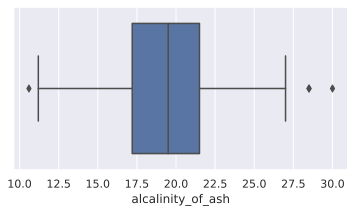

In [40]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['alcalinity_of_ash'], whis=1.5)

plt.xlabel('alcalinity_of_ash')
plt.show()

После проведения графического анализа мы видим, что медиана и среднее арифметическое имеют одинаковые значения, но boxplot показывает равномерные небольшие выбросы справа и слева. Также мы видим, что распределение похоже на нормальное.

##Magnesium

In [41]:
df['magnesium'].value_counts()

88.0     13
86.0     11
98.0      9
101.0     9
96.0      8
102.0     7
112.0     6
85.0      6
94.0      6
80.0      5
92.0      5
89.0      5
97.0      5
103.0     5
107.0     4
106.0     4
90.0      4
108.0     4
104.0     3
111.0     3
78.0      3
116.0     3
95.0      3
120.0     3
110.0     3
100.0     3
87.0      3
84.0      3
118.0     3
93.0      2
115.0     2
113.0     2
91.0      2
105.0     2
121.0     1
123.0     1
132.0     1
126.0     1
124.0     1
122.0     1
128.0     1
117.0     1
151.0     1
139.0     1
136.0     1
99.0      1
70.0      1
81.0      1
162.0     1
134.0     1
119.0     1
82.0      1
127.0     1
Name: magnesium, dtype: int64

Так как мы имеем 53 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

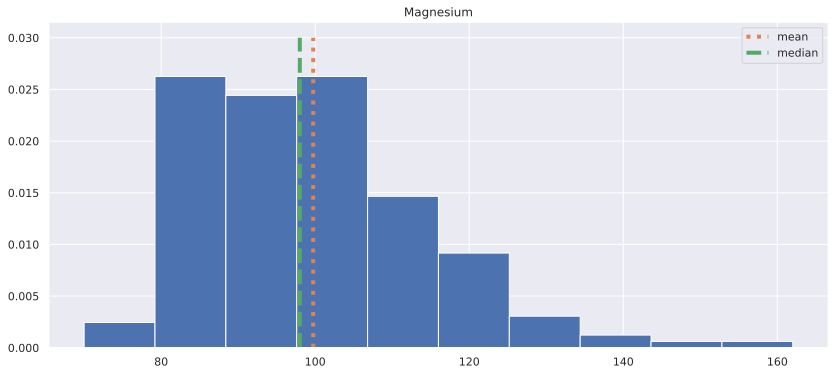

In [42]:
magnesium_mean = df['magnesium'].mean()
magnesium_median = df['magnesium'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['magnesium'],density=True, bins=10)

y = np.linspace(0, 0.03, 10)
plt.plot([magnesium_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([magnesium_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Magnesium')
plt.legend()

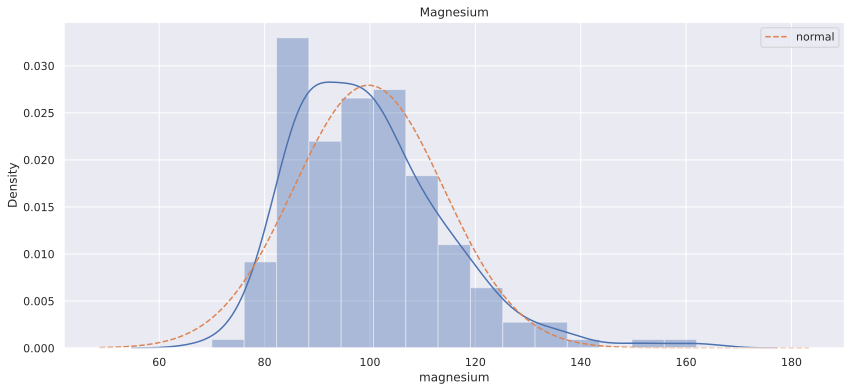

In [43]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['magnesium'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['magnesium'].mean()
scale = df['magnesium'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Magnesium')
plt.legend()

Text(0, 0.5, 'квантили выборки')

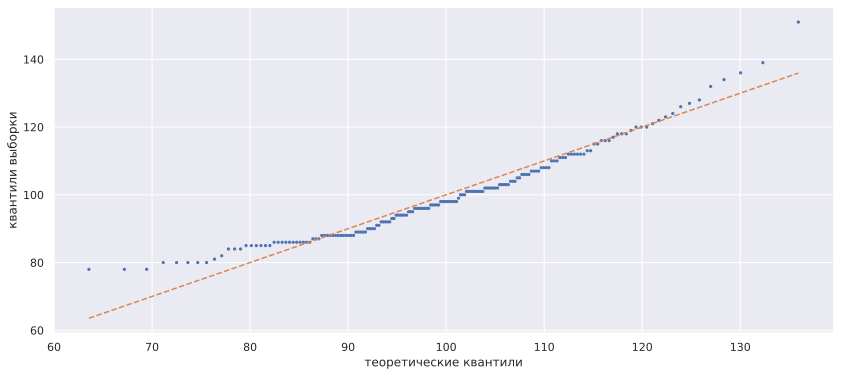

In [44]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['magnesium'].mean()
scale = df['magnesium'].std()
    
interval = np.linspace(0, 1, df['magnesium'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['magnesium'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

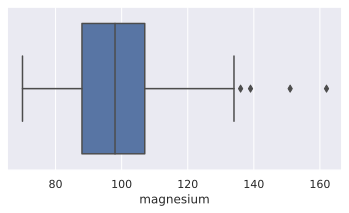

In [45]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['magnesium'], whis=1.5)

plt.xlabel('magnesium')
plt.show()

После проведения графического анализа мы можем сделать вывод о наличии выбросов с права в данной выборке так, среднее арифметическое находится правее от медианы и boxplot показывает наличие выбросов с права. Также мы видим, что распределение не относится к нормальному. 

##Total_phenols

In [46]:
df['total_phenols'].value_counts()

2.20    8
3.00    6
2.80    6
2.60    6
2.00    5
       ..
2.90    1
2.02    1
3.27    1
2.83    1
1.93    1
Name: total_phenols, Length: 97, dtype: int64

Так как мы имеем 97 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

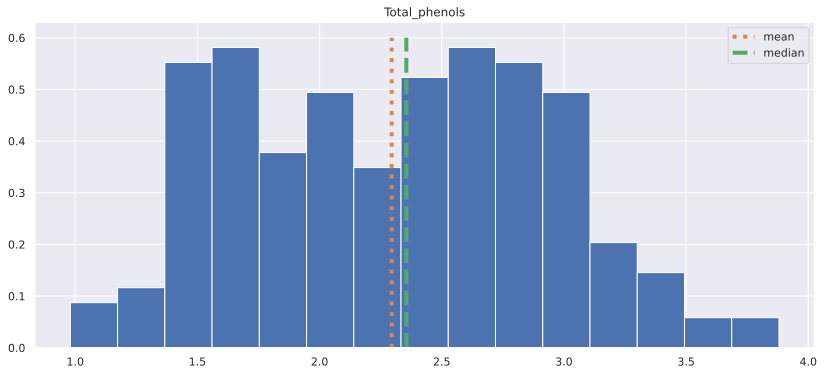

In [47]:
total_phenols_mean = df['total_phenols'].mean()
total_phenols_median = df['total_phenols'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['total_phenols'],density=True, bins=15)


y = np.linspace(0, 0.6, 10)
plt.plot([total_phenols_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([total_phenols_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Total_phenols')
plt.legend()

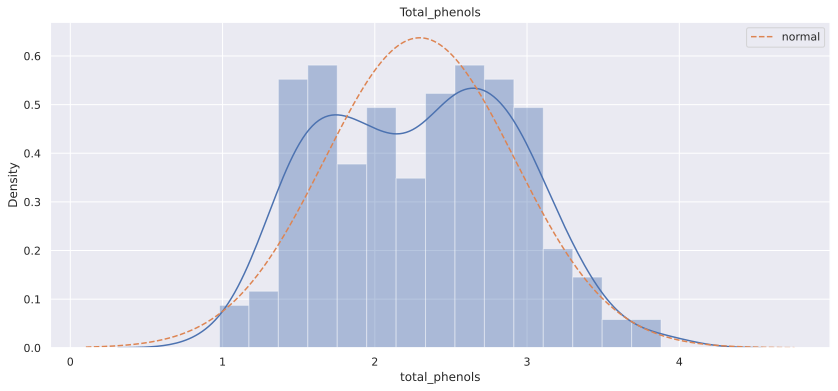

In [48]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['total_phenols'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['total_phenols'].mean()
scale = df['total_phenols'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Total_phenols')
plt.legend()

Text(0, 0.5, 'квантили выборки')

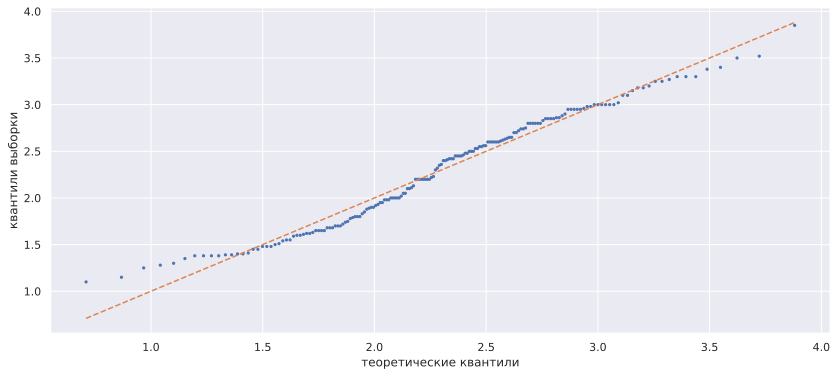

In [49]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['total_phenols'].mean()
scale = df['total_phenols'].std()
    
interval = np.linspace(0, 1, df['total_phenols'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['total_phenols'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

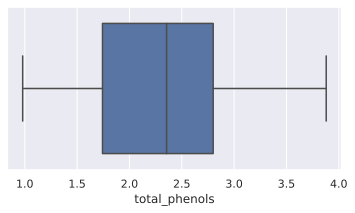

In [50]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['total_phenols'], whis=1.5)

plt.xlabel('total_phenols')
plt.show()

После проведения графического анализа мы можем сделать вывод об отсутствии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения и boxplot показывает отсутствие выбросов. Также мы видим, что распределение не относится к нормальному. 

##Flavanoids 

In [51]:
df['flavanoids'].value_counts()

2.65    4
0.58    3
2.68    3
0.60    3
1.25    3
       ..
2.78    1
1.02    1
1.30    1
2.90    1
3.25    1
Name: flavanoids, Length: 132, dtype: int64

Так как мы имеем 132 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

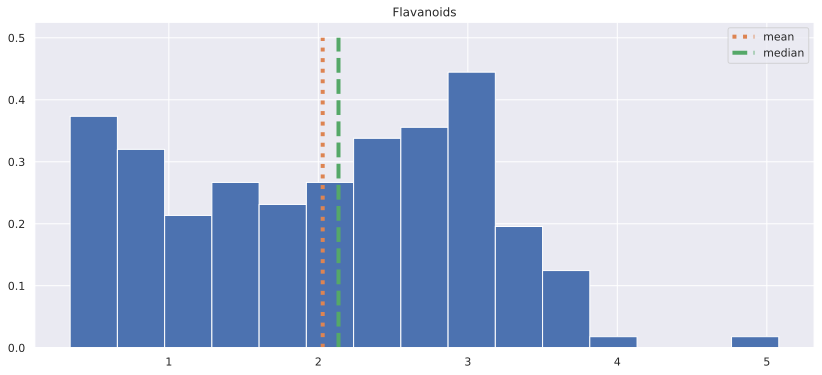

In [52]:
flavanoids_mean = df['flavanoids'].mean()
flavanoids_median = df['flavanoids'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['flavanoids'],density=True, bins=15)

y = np.linspace(0, 0.5, 10)
plt.plot([flavanoids_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([flavanoids_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Flavanoids')
plt.legend()


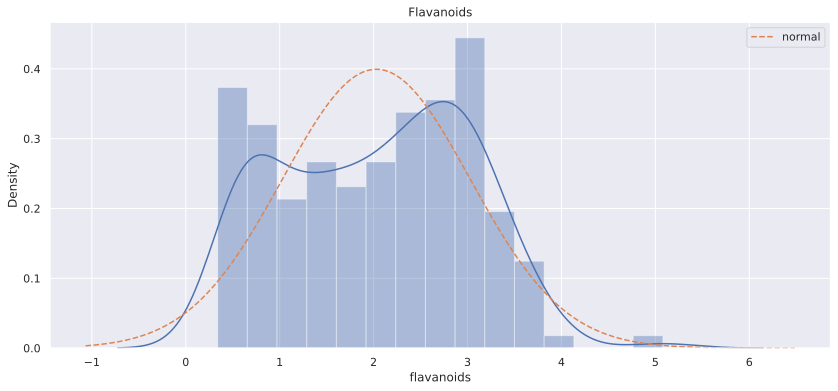

In [53]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['flavanoids'], bins=15)
sns.set(rc={'figure.figsize':(16, 6)})

    
loc = df['flavanoids'].mean()
scale = df['flavanoids'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Flavanoids')
plt.legend()

Text(0, 0.5, 'квантили выборки')

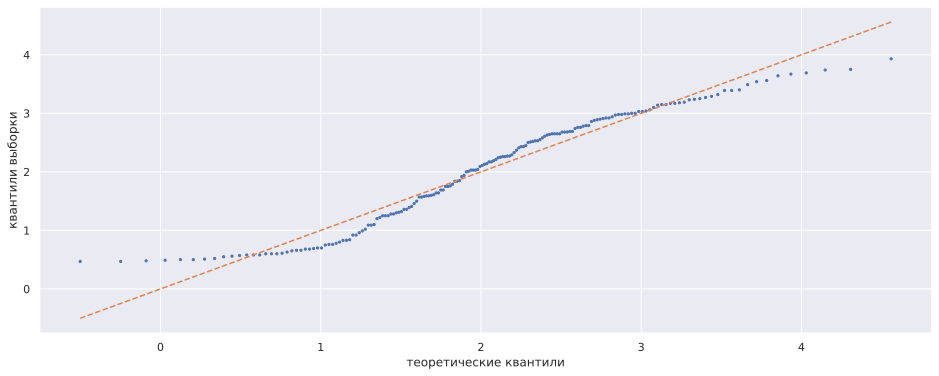

In [54]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['flavanoids'].mean()
scale = df['flavanoids'].std()
    
interval = np.linspace(0, 1, df['flavanoids'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['flavanoids'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

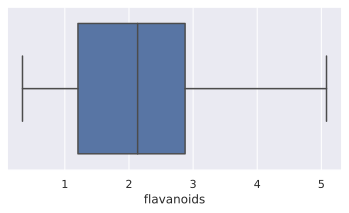

In [55]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['flavanoids'], whis=1.5)

plt.xlabel('flavanoids')
plt.show()

После проведения графического анализа мы можем сделать вывод об отсутствии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения и boxplot показывает отсутствие выбросов. Также мы видим, что распределение не относится к нормальному.

## Nonflavanoid_phenols 

In [56]:
df['nonflavanoid_phenols'].value_counts()

0.26    11
0.43    11
0.29    10
0.32     9
0.30     8
0.37     8
0.34     8
0.27     8
0.40     8
0.24     7
0.53     7
0.21     6
0.22     6
0.28     5
0.39     5
0.17     5
0.50     5
0.52     5
0.47     4
0.42     4
0.48     4
0.63     4
0.58     3
0.60     3
0.45     3
0.61     3
0.14     2
0.19     2
0.25     2
0.20     2
0.31     2
0.55     1
0.41     1
0.66     1
0.56     1
0.13     1
0.44     1
0.33     1
0.35     1
Name: nonflavanoid_phenols, dtype: int64

Так как мы имеем 39 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

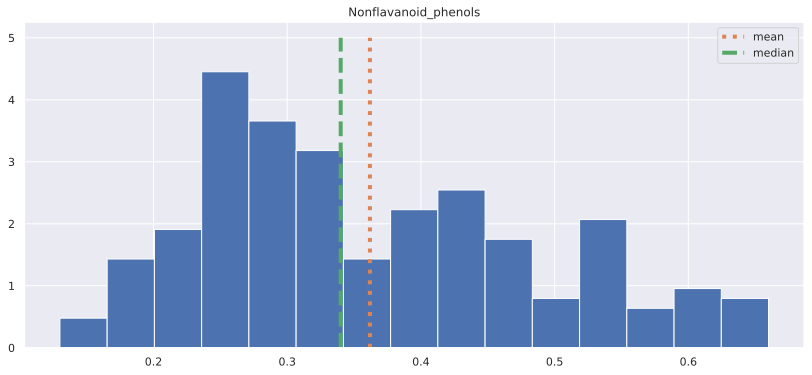

In [57]:
nonflavanoid_phenols_mean = df['nonflavanoid_phenols'].mean()
nonflavanoid_phenols_median = df['nonflavanoid_phenols'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['nonflavanoid_phenols'],density=True, bins=15)


y = np.linspace(0, 5, 10)
plt.plot([nonflavanoid_phenols_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([nonflavanoid_phenols_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Nonflavanoid_phenols')
plt.legend()

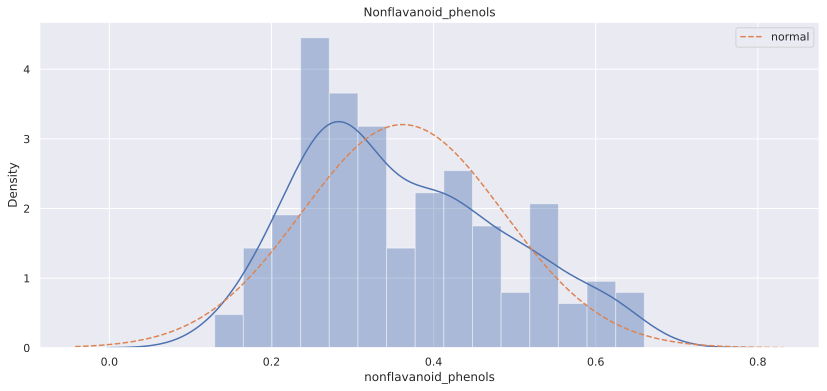

In [58]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['nonflavanoid_phenols'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['nonflavanoid_phenols'].mean()
scale = df['nonflavanoid_phenols'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Nonflavanoid_phenols')
plt.legend()

Text(0, 0.5, 'квантили выборки')

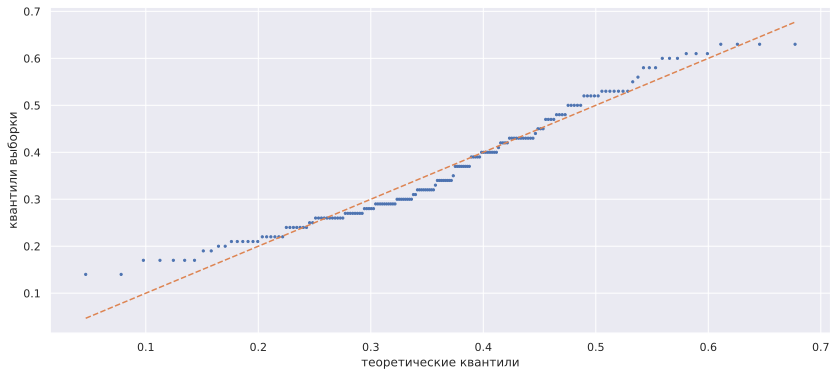

In [59]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['nonflavanoid_phenols'].mean()
scale = df['nonflavanoid_phenols'].std()
    
interval = np.linspace(0, 1, df['nonflavanoid_phenols'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['nonflavanoid_phenols'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

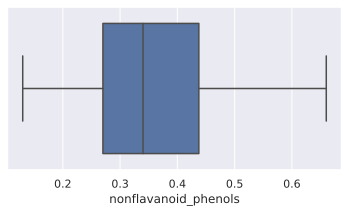

In [60]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['nonflavanoid_phenols'], whis=1.5)

plt.xlabel('nonflavanoid_phenols')
plt.show()

После проведения графического анализа мы можем сделать вывод об отсутствии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения и boxplot показывает отсутствие выбросов. Также мы видим, что распределение не относится к нормальному.

##Proanthocyanins 

In [61]:
df['proanthocyanins'].value_counts()

1.35    9
1.46    7
1.87    6
1.25    5
1.56    4
       ..
1.53    1
0.68    1
1.72    1
1.71    1
0.88    1
Name: proanthocyanins, Length: 101, dtype: int64

Так как мы имеем 101 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

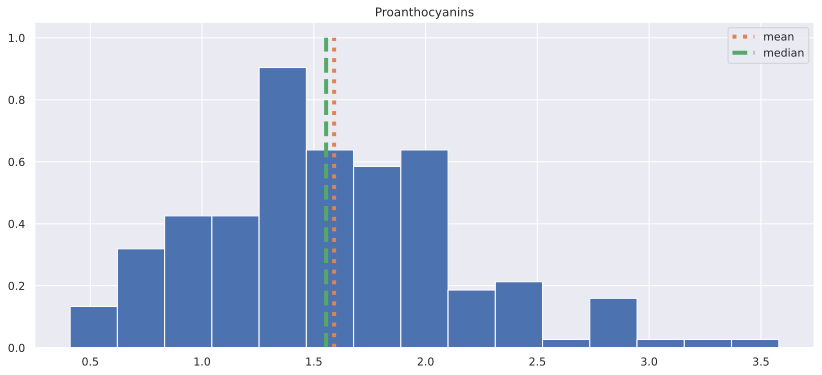

In [62]:
proanthocyanins_mean = df['proanthocyanins'].mean()
proanthocyanins_median = df['proanthocyanins'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['proanthocyanins'],density=True, bins=15)

y = np.linspace(0, 1, 10)
plt.plot([proanthocyanins_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([proanthocyanins_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Proanthocyanins')
plt.legend()

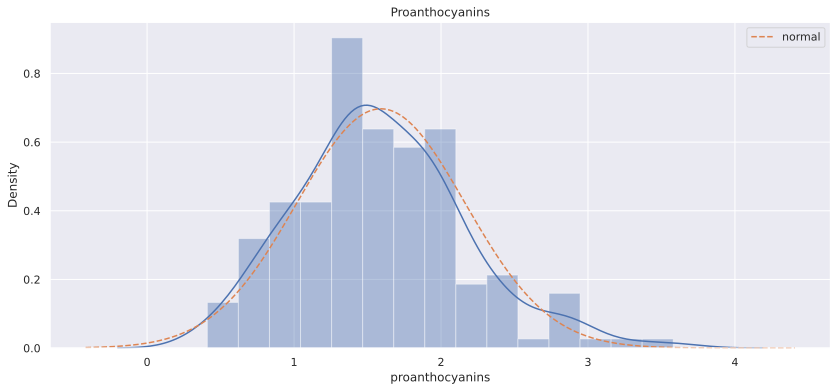

In [63]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['proanthocyanins'], bins=15)
sns.set(rc={'figure.figsize':(16, 6)})

    
loc = df['proanthocyanins'].mean()
scale = df['proanthocyanins'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Proanthocyanins')
plt.legend()

Text(0, 0.5, 'квантили выборки')

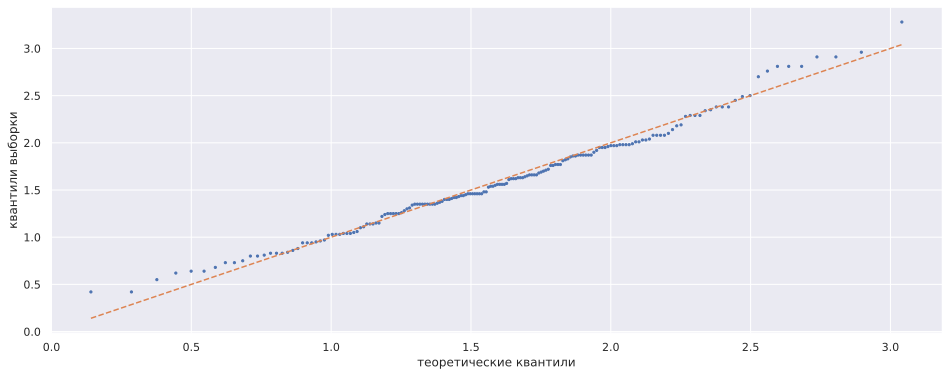

In [64]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['proanthocyanins'].mean()
scale = df['proanthocyanins'].std()
    
interval = np.linspace(0, 1, df['proanthocyanins'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['proanthocyanins'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

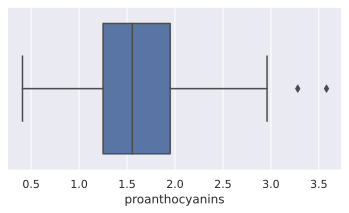

In [65]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['proanthocyanins'], whis=1.5)

plt.xlabel('proanthocyanins')
plt.show()

После проведения графического анализа мы можем сделать вывод о наличии небольших выбросов в данной выборке так, среднее арифметическое находится не много правее от медианы и boxplot показывает наличие выбросов с права. Также мы видим, что распределение похоже на  нормальное.

## Color_intensity   

In [66]:
df['color_intensity'].value_counts()

2.60    4
4.60    4
3.80    4
3.40    3
3.05    3
       ..
3.21    1
6.90    1
7.80    1
5.20    1
6.75    1
Name: color_intensity, Length: 132, dtype: int64

Так как мы имеем 132 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

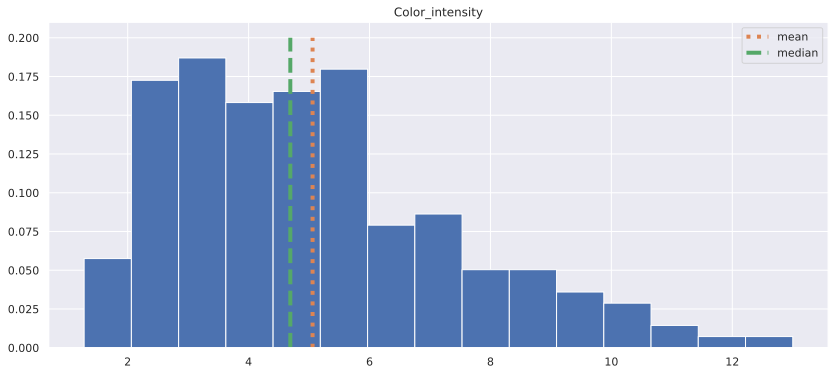

In [67]:
color_intensity_mean = df['color_intensity'].mean()
color_intensity_median = df['color_intensity'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['color_intensity'],density=True, bins=15)

y = np.linspace(0, 0.2, 10)
plt.plot([color_intensity_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([color_intensity_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Color_intensity')
plt.legend()

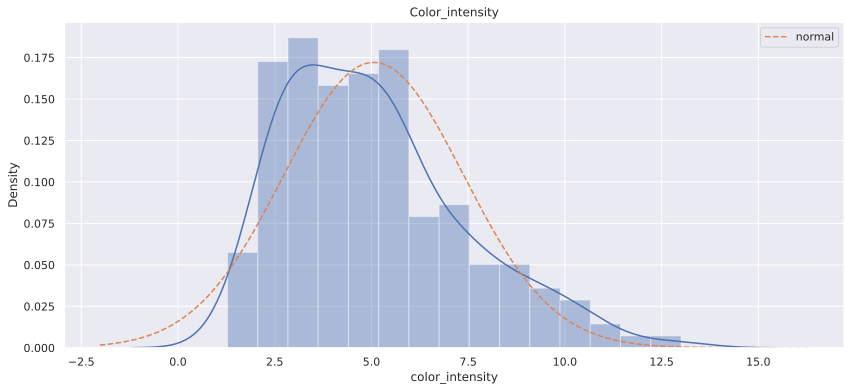

In [68]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['color_intensity'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['color_intensity'].mean()
scale = df['color_intensity'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Color_intensity')
plt.legend()

Text(0, 0.5, 'квантили выборки')

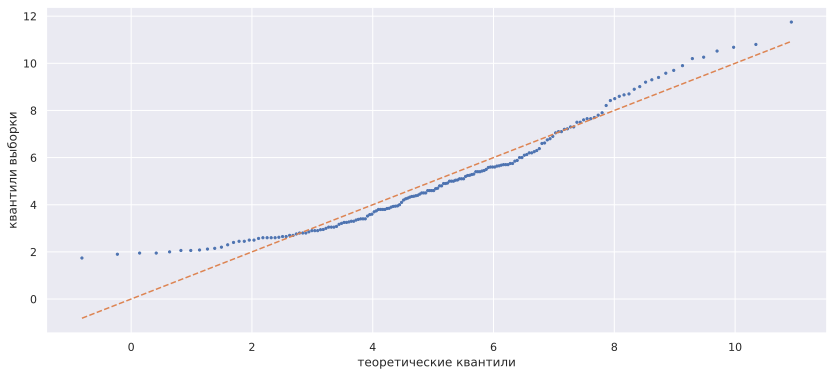

In [69]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['color_intensity'].mean()
scale = df['color_intensity'].std()
    
interval = np.linspace(0, 1, df['color_intensity'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['color_intensity'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

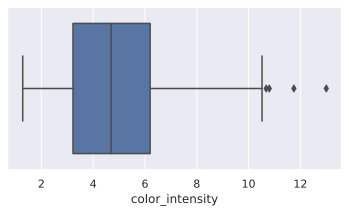

In [70]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['color_intensity'], whis=1.5)

plt.xlabel('color_intensity')
plt.show()

#Hue

После проведения графического анализа мы можем сделать вывод о наличии выбросов в данной выборке так, среднее арифметическое находится правее от медианы и boxplot показывает наличие выбросов с права. Также мы видим, что распределение не похоже на нормальное.

In [71]:
df['hue'].value_counts()

1.04    8
1.23    7
1.12    6
0.89    5
0.57    5
       ..
1.17    1
0.55    1
0.76    1
1.22    1
0.69    1
Name: hue, Length: 78, dtype: int64

Так как мы имеем 78 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

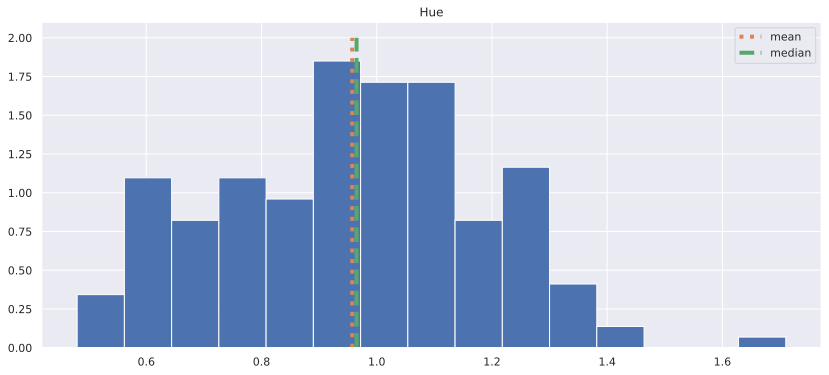

In [72]:
hue_mean = df['hue'].mean()
hue_median = df['hue'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['hue'],density=True, bins=15)

y = np.linspace(0, 2, 10)
plt.plot([hue_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([hue_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Hue')
plt.legend()

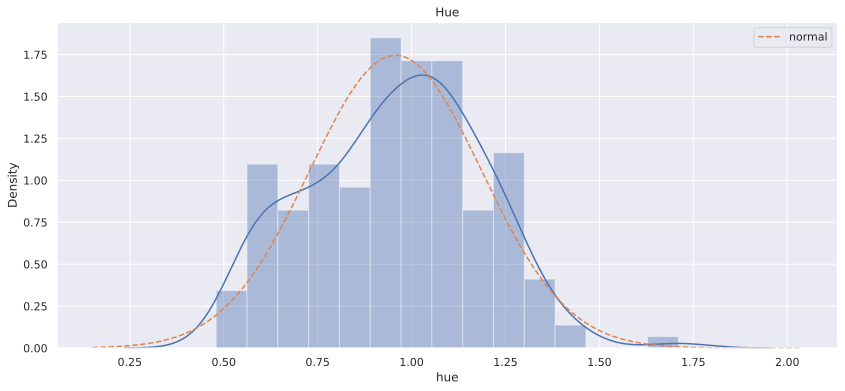

In [73]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['hue'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['hue'].mean()
scale = df['hue'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('Hue')
plt.legend()

Text(0, 0.5, 'квантили выборки')

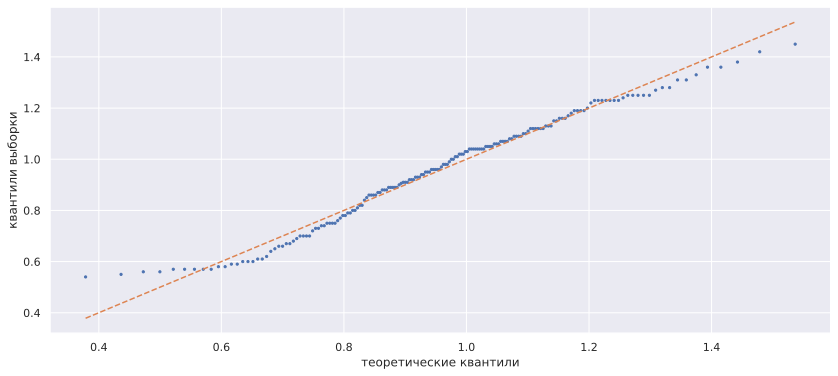

In [74]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['hue'].mean()
scale = df['hue'].std()
    
interval = np.linspace(0, 1, df['hue'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['hue'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

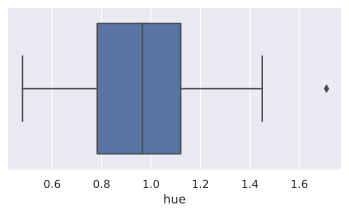

In [75]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['hue'], whis=1.5)

plt.xlabel('hue')
plt.show()

После проведения графического анализа мы можем сделать вывод о наличии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения, но boxplot показывает наличие выбросов с права. Также мы видим, что распределение не похоже на нормальное.

##od280/od315_of_diluted_wines

In [76]:
df['od280/od315_of_diluted_wines'].value_counts()

2.87    5
3.00    4
1.82    4
2.78    4
2.77    3
       ..
3.31    1
3.69    1
2.01    1
1.96    1
2.73    1
Name: od280/od315_of_diluted_wines, Length: 122, dtype: int64

Так как мы имеем 122 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

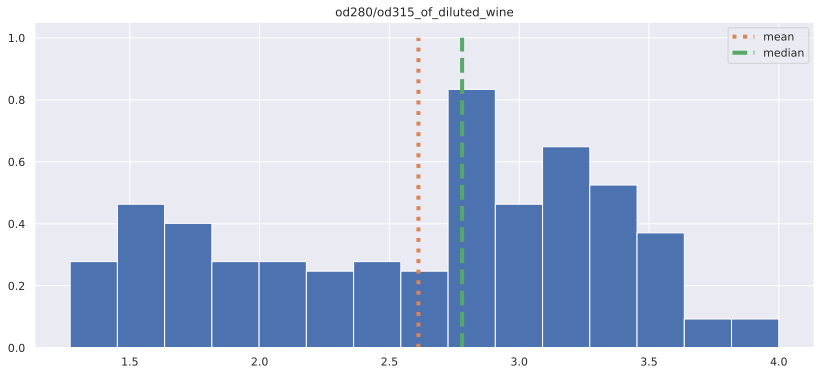

In [77]:
diluted_wines_mean = df['od280/od315_of_diluted_wines'].mean()
diluted_wines_median = df['od280/od315_of_diluted_wines'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['od280/od315_of_diluted_wines'],density=True, bins=15)

y = np.linspace(0, 1, 10)
plt.plot([diluted_wines_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([diluted_wines_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('od280/od315_of_diluted_wine')
plt.legend()

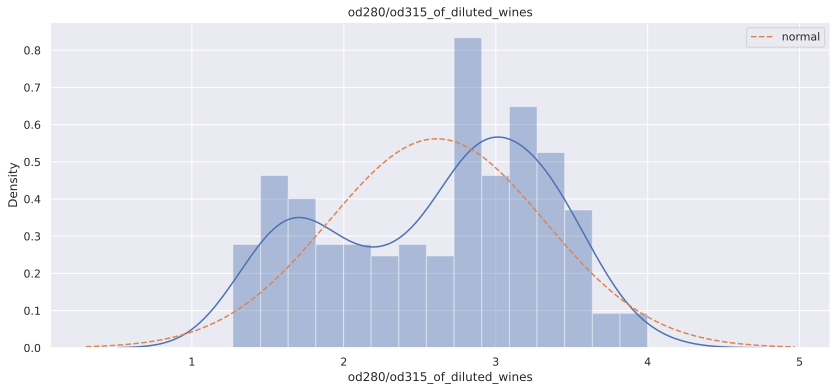

In [78]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['od280/od315_of_diluted_wines'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['od280/od315_of_diluted_wines'].mean()
scale = df['od280/od315_of_diluted_wines'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('od280/od315_of_diluted_wines')
plt.legend()

Text(0, 0.5, 'квантили выборки')

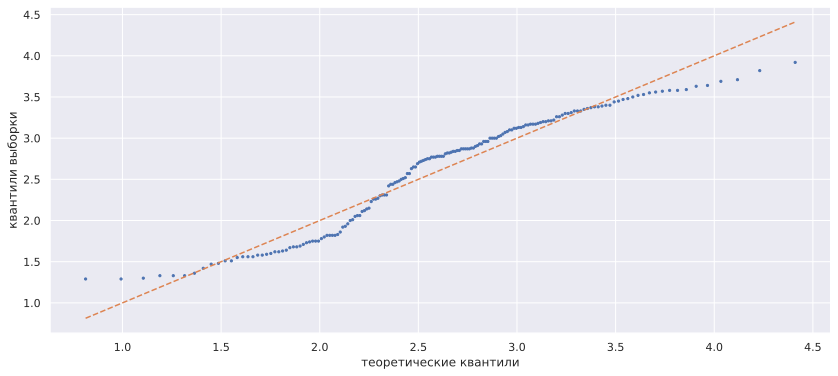

In [79]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['od280/od315_of_diluted_wines'].mean()
scale = df['od280/od315_of_diluted_wines'].std()
    
interval = np.linspace(0, 1, df['od280/od315_of_diluted_wines'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['od280/od315_of_diluted_wines'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

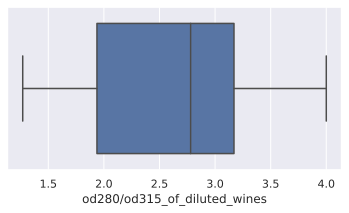

In [80]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['od280/od315_of_diluted_wines'], whis=1.5)

plt.xlabel('od280/od315_of_diluted_wines')
plt.show()

После проведения графического анализа мы можем сделать вывод о наличии выбросов с права в данной выборке так, среднее арифметическое находится правее от медианы и boxplot показывает наличие выбросов с права. Также мы видим, что распределение не относится к нормальному.

##Proline

In [81]:
df['proline'].value_counts()

680.0     5
520.0     5
750.0     4
630.0     4
625.0     4
         ..
342.0     1
1375.0    1
530.0     1
720.0     1
385.0     1
Name: proline, Length: 121, dtype: int64

Так как мы имеем 121 уникальных строк из 178, то мы можем сделать вывод о том что у нас колличественные данные. 

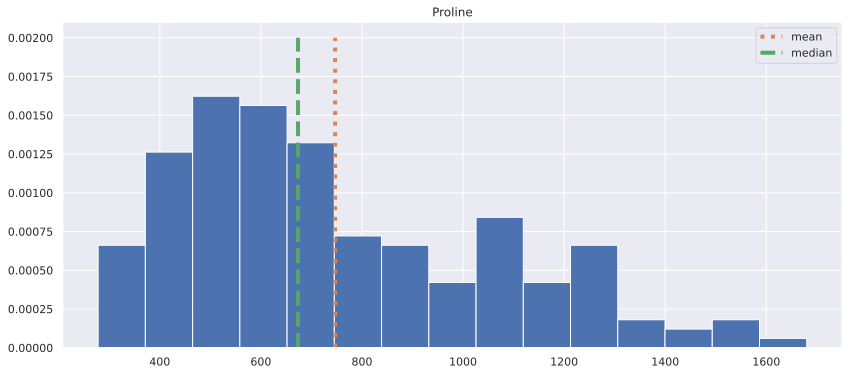

In [82]:
proline_mean = df['proline'].mean()
proline_median = df['proline'].median()
rcParams["figure.figsize"] = 14, 6
plt.hist(df['proline'],density=True, bins=15)

y = np.linspace(0, 0.002, 10)
plt.plot([proline_mean]*10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([proline_median] * 10, y, label='median', linestyle='--', linewidth=4)

plt.title('Proline')
plt.legend()

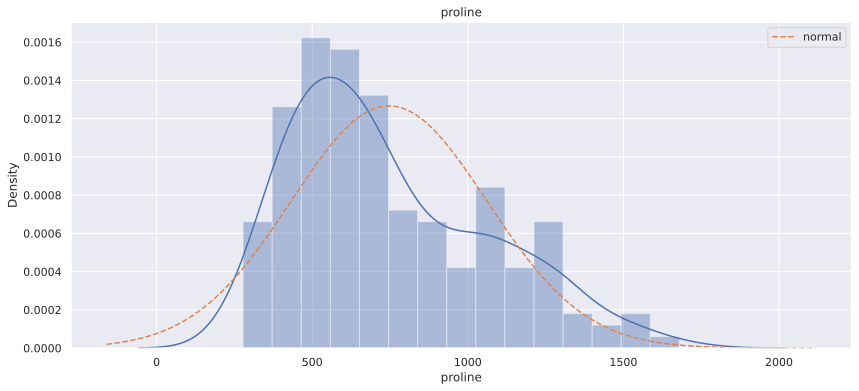

In [83]:
fig, axes = plt.subplots(ncols=1)
sns.distplot(df['proline'], bins=15)
sns.set(rc={'figure.figsize':(14, 6)})

    
loc = df['proline'].mean()
scale = df['proline'].std()
    
x_left, x_right = axes.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
    
axes.plot(x, y, linestyle='dashed', label='normal')
axes.set_title('proline')
plt.legend()

Text(0, 0.5, 'квантили выборки')

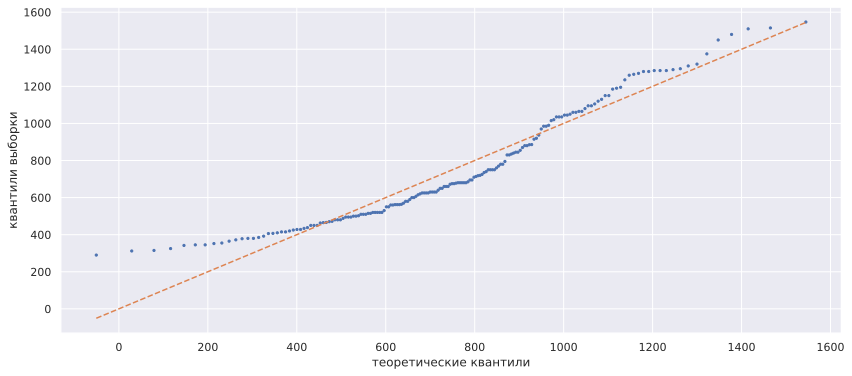

In [84]:
fig, axes = plt.subplots(ncols=1)
sns.set(rc={'figure.figsize':(14, 6)})
    
loc = df['proline'].mean()
scale = df['proline'].std()
    
interval = np.linspace(0, 1, df['proline'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['proline'], interval)
 
axes.scatter(x, y, s=5)
axes.plot(x, x, color='C1', linestyle='dashed')
axes.set_xlabel('теоретические квантили')
axes.set_ylabel('квантили выборки')

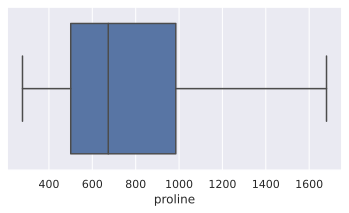

In [85]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['proline'], whis=1.5)

plt.xlabel('proline')
plt.show()

После проведения графического анализа мы можем сделать вывод об отсутствии выбросов в данной выборке так, медиана и среднее арифметическое имеют похожие значения и boxplot показывает отсутствие выбросов. Также мы видим, что распределение не относится к нормальному.

## Class       

In [86]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

Так как мы имеем 3 уникальные строки из 178, то мы можем сделать вывод о том что у нас номинативные данные. 

Text(0.5, 1.0, 'class')

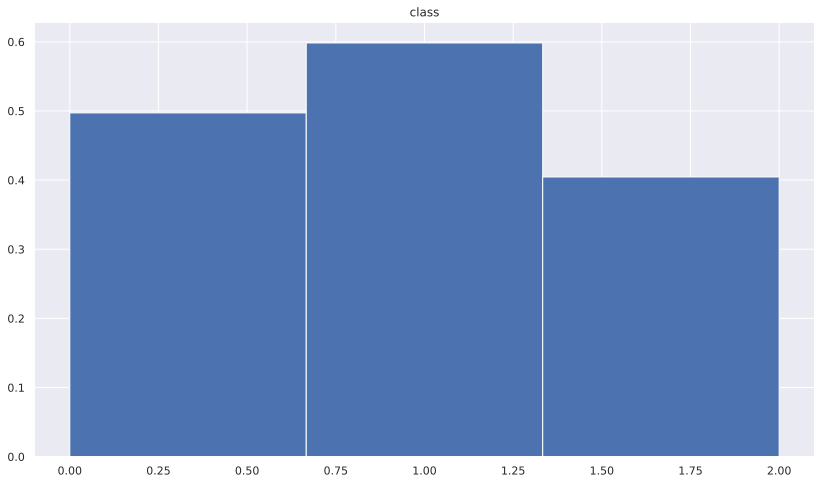

In [87]:
rcParams["figure.figsize"] = 14, 8
plt.hist(df['class'],density=True, bins=3)
plt.title('class')


Из данной гистограммы мы можем сделать вывод о том, что наши категориальные данные сбалансированы.

Большинство выборок из данного дата-сета имеют небольшие, незначитедьные выбросы, которые можно оставить так, как они могут оказаться не выбросами, а реальными данными. Также большенство выборок имеют ненормальное распределение. Проведя графический анализ мы можем выдвинуть гипотезы о том, что данные из proanthocyanins и alcalinity_of_ash могут иметь нормальное распределение в качестве нулевой гипотезы  H0  и что данные имеют не нормальное распределение в качестве альтернативной двухсторонней гипотезы при уровне значимости 0.05.

In [88]:
shapiro_test = stats.shapiro(df['alcalinity_of_ash'])
stat = shapiro_test[0]
p = shapiro_test[1]
alpha = 0.05
print(f'W = {stat}, p = {p}')
if p > alpha:
    print('Распределение похоже на нормальное (H0 отклонить не можем)')
else:
    print('Распределение на нормальное не похоже (отклоняем H0)')

W = 0.9902253746986389, p = 0.26386943459510803
Распределение похоже на нормальное (H0 отклонить не можем)


In [89]:
shapiro_test = stats.shapiro(df['proanthocyanins'])
stat = shapiro_test[0]
p = shapiro_test[1]
alpha = 0.05
print(f'W = {stat}, p = {p}')
if p > alpha:
    print('Распределение похоже на нормальное (H0 отклонить не можем)')
else:
    print('Распределение на нормальное не похоже (отклоняем H0)')

W = 0.9807231426239014, p = 0.01445337850600481
Распределение на нормальное не похоже (отклоняем H0)


После проверки выборок на нормальность критерием Шапиро-Уилка мы принимаем нулевую гипотезы для выборки alcalinity_of_ash так, как она не отвергается и альтернативную для proanthocyanins так, как нулевая гипотеза отвергается

Посчитаем коэффициент Пирсона для рассчета коэфициента корреляции для alcalinity_of_ash и class так, как alcalinity_of_ash имеет нормальное распределение.

In [90]:
df[['alcalinity_of_ash',  'class']].corr()

,alcalinity_of_ash,class
alcalinity_of_ash,1.000000,0.517859
class,0.517859,1.000000


Также посчитаем коэффициент Спирмана для рассчета коэфициента корреляции для всех признаков

In [91]:
df[['alcohol', 'malic_acid', 'ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'class']].corr(method='spearman')

,alcohol,malic_acid,ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.140430,0.243722,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580,-0.354167
malic_acid,0.140430,1.000000,0.230674,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466,0.346913
ash,0.243722,0.230674,1.000000,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163,-0.053988
magnesium,0.365503,0.080188,0.361488,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575,-0.250498
total_phenols,0.310920,-0.280225,0.132193,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470,-0.726544
flavanoids,0.294740,-0.325202,0.078796,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904,-0.854908
nonflavanoid_phenols,-0.162207,0.255236,0.145583,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112,0.474205
proanthocyanins,0.192734,-0.244825,0.024384,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249,-0.570648
color_intensity,0.635425,0.290307,0.283047,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096,0.131170
hue,-0.024203,-0.560265,-0.050183,0.036095,0.439457,0.535430,-0.267813,0.342795,-0.418522,1.000000,0.485454,0.207740,-0.616570


После проведения корреляционного анализа мы видим наличие сильной взаимосвязи между концентрацией флавоноидов и сортом вина. 

Флавоноиды имеют большое влияние на структуру и цвет вина. Они находятся в шкурке, семенах и гребнях, как белых, так и красных сортов винограда; они составляют 25 % от общего содержания фенолов в белых винах, произведенных без контакта с кожицей, и около 80-90 % - в красных винах изготовленных традиционным способом. Флавоноиды могут существовать в виде мономерных форм, или же полимеризироваться с другими флавоноидами, нефлавоноидами, сахарами, или комбинациями перечисленных соединений. Полимерные флавоноиды найдены на всех стадиях производства красных вин. Они составляют большую часть всех фенольных соединений присутствующих в вине, дальнейшая полимеризация дает полимерные фенольные соединения, такие как конденсированные и гидролизированные танины. 